<a href="https://colab.research.google.com/github/rohansiddam/Python-Journey/blob/main/127%20-%20Lesson%20127%20(ARIMA%201%20-%20Components%20of%20Time%20Series).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson 127: ARIMA I - Components of Time Series

---

#### Teacher-Student Activities

In the previous classes, we had explored many supervised and unsupervised machine learning models that either perform prediction or create clusters of data based on certain similarities.

From this class onwards, you will discover a new category of prediction models that involve a **time** component known as the **Time Series Forecasting** models. Let us first look at an example where  time series analysis is needed.

Consider the **Air passenger** dataset that has following two attributes:

|Attribute|Description|
|-|-|
|Month|Months from the year 1949 to 1960.|
|#Passengers| Number of airline passengers per month.|

**Dataset Credits:** https://www.kaggle.com/rakannimer/air-passengers

**Link to the dataset:** https://s3-whjr-curriculum-uploads.whjr.online/14b9487d-e1f7-4a83-be06-2da854d82783.csv




In [ ]:
# Import the Python modules and load the dataset.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('https://s3-whjr-curriculum-uploads.whjr.online/14b9487d-e1f7-4a83-be06-2da854d82783.csv')
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [ ]:
df.shape

(144, 2)

Here, you can observe that there are only two columns in the dataset. The objective here is to build a model to predict or forecast the demand (passenger traffic) in Airplanes. Hence, the `Month` column is the feature variable and `#Passengers` column is the target variable.

In such cases, when a time component is the only or the most important feature variable (in this case, `Month` column) and we need to predict the other variable i.e. the number of Airplane passengers in the upcoming months, we need **Time Series Forecasting** models.

In the upcoming lessons, we will learn a very popular time series model known as **ARIMA** (**A**uto **R**egressive **I**ntegrated **M**oving **A**verage) model.

Before we start exploring ARIMA model, we must first discuss some basic concepts associated with time series forecasting.


---

#### Understanding Time Series

**Forecasting** is predicting the future as accurately as possible, given all of the information available, including the historical data. Forecasting is needed in many situations, some of the examples are:  
-  Stocking an inventory requires forecasts of stock requirements.

  <img src ="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/7a89b44f-c117-4375-82e2-a344e0704057.png"/>
- Scheduling staff in a call centre next week requires forecasts of call volumes.

  <img src = "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/f5bbed13-1f8c-4c62-a5e8-be5d4320adbe.png"/>

- Forecasting the closing price of a stock each day.

  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/6650a736-510a-4f70-bd4f-75774aca9140.png"/>

There is a wide range of forecasting methods, each developed
for specific purposes. However, we will concentrate only on forecasting future data concerning **time series** domain.

**Time Series:**

- Anything that is observed sequentially over time is a **time series**.
-  It is a set of observations taken at particular time intervals (usually equal intervals).
- In time series, we have only 2 variables, **time** and the variable we want to forecast. Thus, in a time series plot, we have "time" on $x$-axis and the magnitude of the data to be forecasted on $y$-axis as shown in the image given below:

<center>
  <img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/e96cad4b-77da-4060-bb8d-c650b44df40e.png"/>

  `Fig: Global average temperature change over years`
  
  `Image source: https://commons.wikimedia.org/wiki/File:20200324_Global_average_temperature_-_NASA-GISS_HadCrut_NOAA_Japan_BerkeleyE.svg`
</center>

- The current time is defined as $t$ and an observation at the current time is defined as $y_t$.  The previous time is $(t-1)$ and the time before that is $(t-2)$. The observations at these times are $y_{t-1}$ and $y_{t-2}$ respectively.
- Times in the future are what we are interested in forecasting. For example the next time is $(t+1)$ and the time after that is $(t+2)$. The observations at these times are $y_{t+ 1}$ and $y_{t+ 2}$ respectively.

- Examples of time series data include:
  - Daily IBM stock prices
  - Monthly rainfall
  - Quarterly sales results for Amazon
  - Annual Google profits

**Lags:**

- When you work with time series, you will be often interested in the observations made at prior times, called **lag times** or **lags**.
- A **lag** can be seen as the time difference between two points.
- In the case of daily data, $y_t$ is the current  value of a time series, while $y_{t-1}$ (or lag 1) is the value from yesterday and $y_{t-2}$ (or lag 2) is the observation that was made the day before yesterday and so on.


**Time Series forecasting** is the process of using a statistical model to predict future values of a time series based on past results. But, *why do we need Time Series Forecasting models when we  already have other prediction models*? 🤔  Let us try to understand this with a simple example.

**Why Time Series Forecasting?**

Suppose you own a footwear store.


<img src = "https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/edf100bd-e14f-4824-a73f-aee19eb4e38f.jpg"/>

`Image Source: https://commons.wikimedia.org/wiki/File:20190831_130215_Shoe_shop_in_Ulica_Waszyngtona_25,_Bialystok.jpg`

To determine how many pair of shoes you sell every month, you just add up the sales of every month. But, *what if you want to predict what will be the sales in the next month or next year*?

In this case, you have only one variable i.e. "sales" and you need to predict that variable in accordance with **time**.

A natural question is: How can we have predict sales with respect to time?🤔

The sale of shoes depends on a lot of factors. Some of them may be:

1. The demand of party wear shoes is at its peak during marriage season, christmas and other major events of the year.

2. Kids school shoes are in heavy demand when new session of school starts.

3. Generally people use different shoes based on various seasons.

In all above factors, time is common. These all are time-based events which repeats themselves in particular months. The time series forecasting algorithms takes care of these repetetive cycles and predicts the variables accordingly.

Hence, in cases where time is the only feature variable used to predict the other variable, we need time series forecasting.

Some other use cases are:
- Forecasting the birth rate at all hospitals in a city each year.
- Forecasting the number of passengers through a train station each day.
- Forecasting unemployment for a state each quarter.



Let us now perform time series forecasting on a dummy dataset and thereafter, we will come back to solve the above problem statement.




---

####  Activity 1: Data Preparation

For understanding how time series forecasting models work, let us first create a dummy dataset consisting of following two columns:              
- `Month`: Months from the year `1989` to `2000`.
- `Sales`: Random integers between `100` and `1000`.

Use `date_range()` function of `pandas` module to generate dates from `'1/1/1989'` to `'31/12/2000'`. This function returns a fixed frequency DatetimeIndex. The syntax of this function is as follows:    

`pandas.date_range(start = None, end = None, freq = None)` where,
- `start`: Left bound for generating dates.
- `end`: Right bound for generating dates.
- `freq`: Frequency strings. e.g.  'D' (default) for days, 'H' for hours and 'M' for months.

In [ ]:
# T1.1: Generate random time series data
time = pd.date_range(start = '1/1/1989', end = '31/12/2000', freq = 'M')

<ipython-input-8-66da81982594>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  time = pd.date_range(start = '1/1/1989', end = '31/12/2000', freq = 'M')


Hence, you may observe that there is sales data for each month from 1989 to 2000. Let us further explore this dataset to determine the number of rows and data types of the columns.

In [ ]:
# S1.1: Get the total number of rows and columns and data types of columns.
import numpy as np

values = np.random.randint(100,1000,len(time))

There are 144 rows and 2 columns  and no missing values in the dataset. Also, the data type of the `Month` column is `datetime` which is exactly what we need.  
Let us use this column as an index of the DataFrame using `set_index()` function. Store this indexed DataFrame as a separate DataFrame.


In [ ]:
# S1.2: Use 'Month' column as an index
dummy_df = pd.DataFrame({'Month' : time, 'Sales' : values})

In [ ]:
dummy_index_df = dummy_df.set_index('Month')
dummy_index_df.head()

,Sales
Month,
1989-01-31,495
1989-02-28,915
1989-03-31,188
1989-04-30,119
1989-05-31,572


In [ ]:
dummy_df.head()

,Month,Sales
0,1989-01-31,495
1,1989-02-28,915
2,1989-03-31,188
3,1989-04-30,119
4,1989-05-31,572


Let us create a line plot to visualise the month-wise indexed DataFrame.

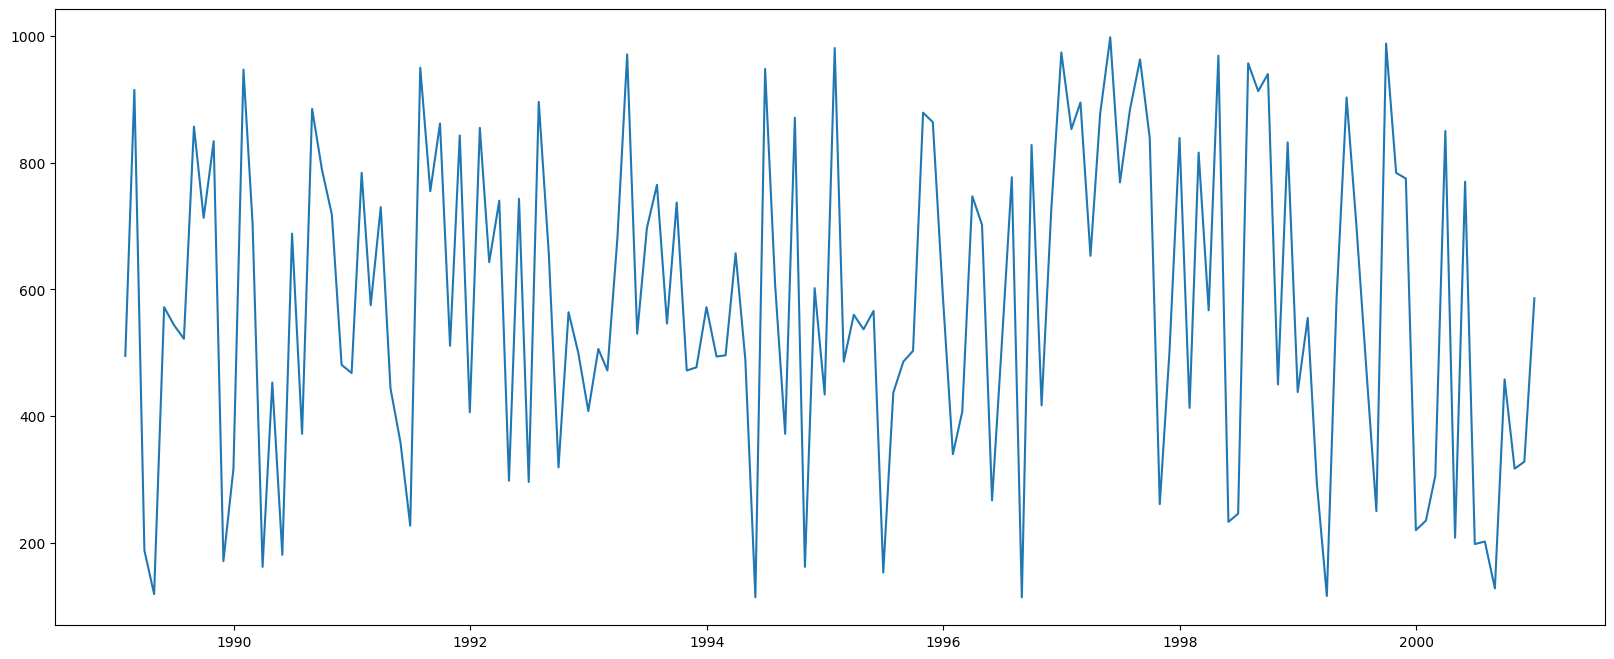

In [ ]:
# S1.3: Visualise time-series plot.
plt.figure(figsize = (20,8))
plt.plot(dummy_df['Month'], dummy_df['Sales'])
plt.show()

You may notice that the plot moves in upward direction and exhibits certain repeating patterns. To understand this behaviour of time-series plot, let us understand the components of time-series data.

---

#### Activity 2: Decomposing Time Series Data

The components, by which a time series is composed, are called the **components** of time series data.  There are four basic components of the time series data described below. However, not every time series data is composed of all these four components.

**1. Trend:**  

- The trend shows the variation of data with time.
- Using a trend, you can see how your data increases or decreases over time.
- A positive or **upward** trend increases with time, whereas a negative or **downward** trend decreases with time, as shown in image below:

  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/24a04f4b-44b7-4d76-8b8c-f88e65a69839.png"/>

  `Fig 2.1: Upward, downward and No trends` </center>

- The stock market fluctuations, population growth, production in a company are all examples of trends.
- Trend may happen for some time and then it disappears. It may or may not repeat.

**2. Seasonality:**
- Seasonality is used to find the variations which occur at regular intervals of time.
- A seasonal time series has patterns that repeat at regular intervals, for example high sales at every weekend as shown in image below:
  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/ff3ed7e4-1264-4143-8a74-73ebd4a5dc7a.PNG"/>

  `Fig 2.2: An example of a seasonal time series` </center>

- This is a repeating pattern within a fixed time period, while in trend this is not the case.

**3. Irregularity:**

- These are erratic or unsystematic and are also known as residual or noise.
- These variations are purely random and usually caused by unforeseeable circumstances, such as a sudden decrease in population because of a natural calamity.
- An example of irregular variation is shown in the image below:
  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/480f84f2-be00-4e20-946d-09c2dcc04810.jpg"/>

  `Fig 2.3: An example of irregular variations` </center>

**4. Cyclic:**

- A cycle refers to the period of ups and downs of a time series, mostly observed in business cycles.
- They do not have a time period, they can happen anytime, may be in 2 years, 4 years or even in 6 months.
- These trends are similar to seasonality. However, a seasonal time series have patterns that occur at fixed time period. Whereas a cyclic pattern are not of fixed time period.
  <center><img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/e6662ca3-3ca6-42de-9f77-a6cb6232468d.PNG"/>

  `Fig 2.4:  An example of cyclic variations` </center>





Some of the above components may or may not exist. For example, a time series may or may not have a trend. These components can be combined either  additively or multiplicatively.

**Additive Model:**  

An additive model suggests that the components are added together as follows:

\begin{align}
Y(t) = T(t) + C(t) + S(t) + R(t)
\tag{2.1}
\end{align}

Here, $T(t)$ , $C(t)$ , $S(t)$  and $R(t)$ represents the values of the trend, cyclic, seasonal, and random fluctuations (residuals) respectively at time $t$ .

**Multiplicative Model:**

A multiplicative model suggests that the components are multiplied together as follows:

\begin{align}
Y(t) = T(t) \times C(t) \times S(t) \times R(t)
\tag{2.2}
\end{align}

As can be seen from Equations (2.1) and (2.2), time-series data can be represented either in terms of addition or multiplication of trend,
seasonality, cyclical, and random fluctuations.

**When to use additive or multiplicative model?**
- The additive model works with linear type of time-series data i.e. changes that occur constantly over time.
- The multiplicative model works with a nonlinear type of data such as quadratic or exponential.
- The additive model is useful when the seasonal variation is relatively constant over time, whereas the multiplicative model is useful when the seasonal variation increases over time.



For simplicity reasons, we will join the cycle component into the trend, and rewrite the series components notation for additive structure as:

\begin{align}
Y(t) = T(t) + S(t) + R(t)
\tag{2.3}
\end{align}

And for multiplicative structure:

\begin{align}
Y(t) = T(t)  \times S(t) \times R(t)
\tag{2.4}
\end{align}

Let us now check the Python code to display the additive and multiplicative models of a time series dataset.

**Time Series Decomposition using Python:**

The `statsmodels` library provides an implementation of automatic time series decomposition using a function called `seasonal_decompose()`. It requires you to specify whether the model is additive or multiplicative.

The `seasonal_decompose()` function returns a result object. The result object contains arrays to access following four pieces of data from the decomposition:
1. Original or observed data
2. Trend component
3. Seasonal component
4. Residual component

Let us first perform additive decomposition of our dataset using the steps given below:            
1. Import `seasonal_decompose()` function from `statsmodels.tsa.seasonal` class.
2. Call `seasonal_decompose()` function and pass the indexed DataFrame and `model = 'additive'` as inputs to this function. Store the returned object in a variable, say `additive_result`.
3. Call the `plot()` function using `additive_result` object and display the plots.


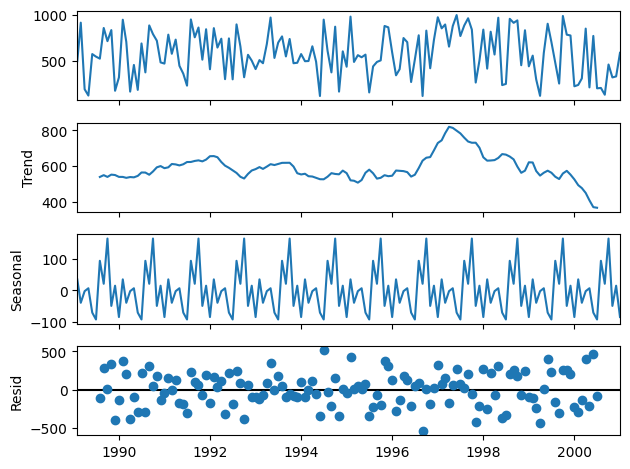

In [ ]:
# T2.1: Perform additive seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
additive_result = seasonal_decompose(dummy_index_df, model = 'additive')

fig = additive_result.plot()
fig.show()

Hence, the `additive_result` object provides access to the trend and seasonal series as arrays. It also provides access to the residuals, which are the time series after the trend, and seasonal components are removed.

Let us now perform multiplicative decomposition of our dataset using the similar steps followed for additive model.        


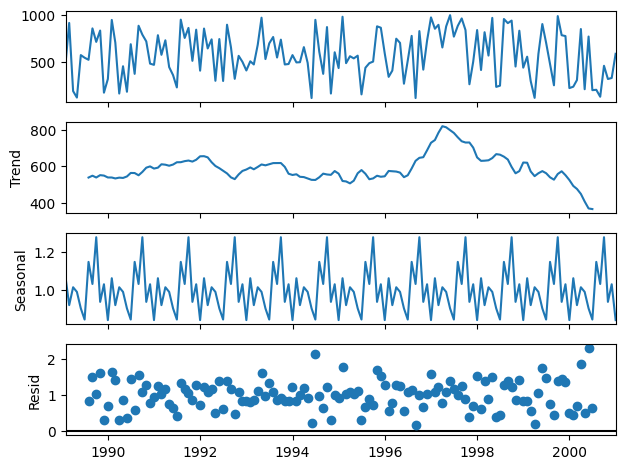

In [ ]:
# S2.1: Perform multiplicative seasonal decomposition
mult_result = seasonal_decompose(dummy_index_df, model = 'multiplicative')

fig2 = mult_result.plot()
fig2.show()

Thus the plotted time-series seasonal decomposition help in identifying the change in trend or seasonality of the data. It gives an overall understanding of the upward (or downward) trend followed in a time-series dataset as well as the yearly seasonality.

Next step is to check **stationarity** of the time-series data.

---

#### Activity 3: Checking Stationarity

Before performing any time-series analysis, we need to check whether our time-series data is stationary or not  as the time series forecasting models assume that the data is stationary.

**What is stationarity?**
- By stationarity, we mean that the given dataset should have a (approximately) constant mean and variance over the given time period.
- Time series are stationary if they do not have trend or seasonal effects.
- Time series are non-stationary if they have trend or seasonal effects.

Refer the image below to understand how stationary and non-stationary time series data looks like:    

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/46b8faad-c2b6-4b23-b167-46d6ef4fcd0e.png"/>

`Fig 3.1: Example of Stationary and Non-Stationary time series`
</center>

- The left-hand side plot is an example of stationary time series as it appears to have constant mean and variance throughout the time.
- The right-hand side plot is an example of non-stationary time series as the mean and variance is increasing with time. Also, it clearly shows trend and seasonality.

Let us again create a line plot for our time series data.

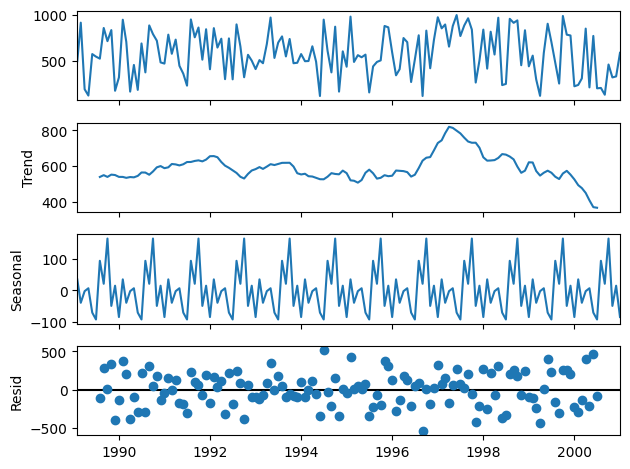

In [ ]:
# S3.1: Visualise time-series plot.
stationary_result = seasonal_decompose(dummy_index_df, model = 'stationary')

fig3 = stationary_result.plot()
fig3.show()

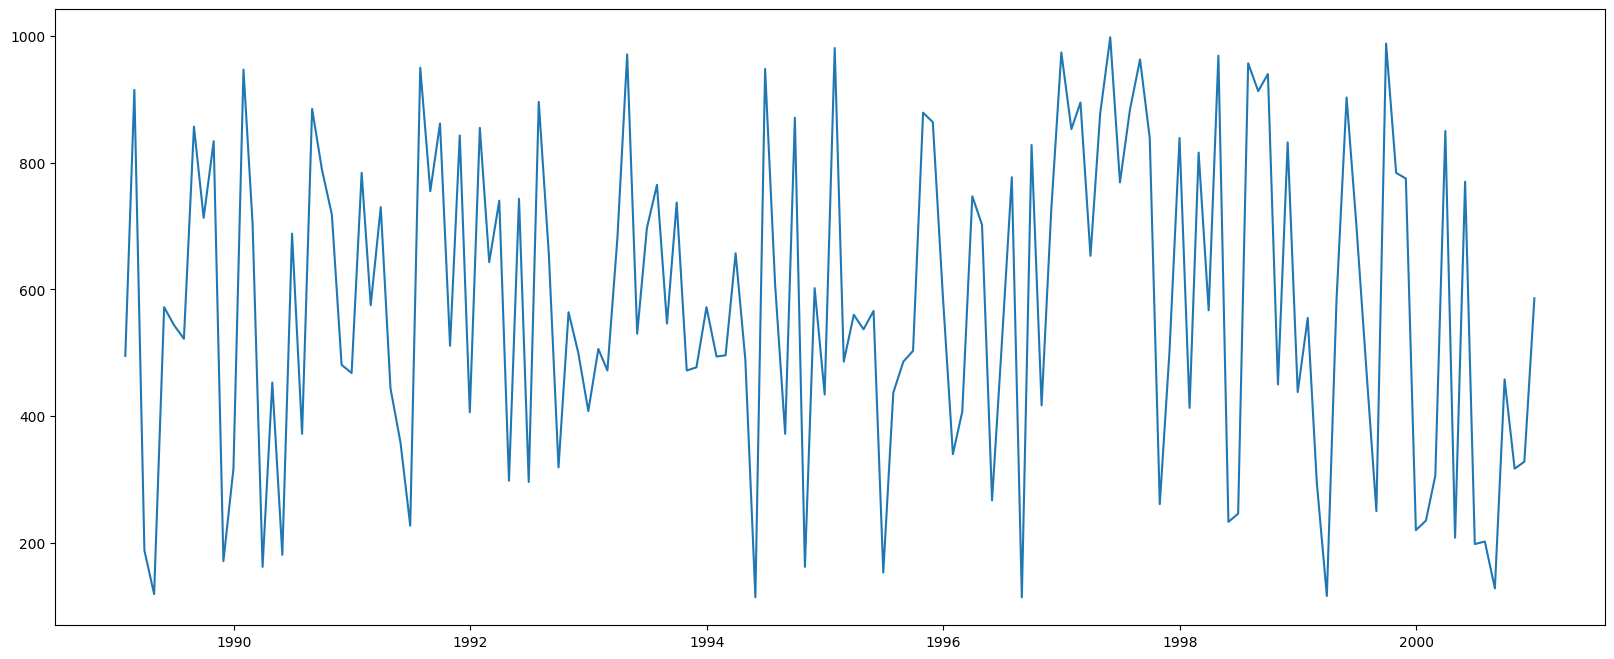

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(dummy_index_df)
plt.show()

By looking at the plot, we can say that the mean and variance of the above data may or may not be constant.  Let us confirm whether the dataset is stationary or not by using following two widely used techniques:

1. Rolling Statistics Test
2. ADF (Augmented Dickey Fuller ) Test



**1. Rolling Statistics Test**

A rolling analysis of a time series model is often used to assess the model's stability over time.
Rolling means creating a rolling window with a specified size and performing calculations on the data in this window which, of course, rolls through the data. The figure below explains the concept of rolling.

<center>
<img src="https://s3-whjr-v2-prod-bucket.whjr.online/whjr-v2-prod-bucket/79c49444-a6b8-48a5-8aef-789f9d7a5eb5.jpg"/>

`Fig 3.1: Rolling window of size 3`
</center>

In the above example, for a rolling window of size 3, a function like mean, median, standard deviation etc. is calculated repeatedly over every data point.

Let us assume a window size of 12 considering that our dataset has month-wise distribution of data.

Now, calculate rolling mean (aka moving average) and rolling standard deviation (aka moving standard deviation) by using `rolling().mean()` and `rolling().std()` functions of pandas DataFrame. The syntax for doing this is:                
- `DataFrame.rolling(window = 12).mean()`
- `DataFrame.rolling(window = 12).std()`



In [ ]:
# S3.2: Determine rolling statistics
dummy_mean = dummy_index_df.rolling(window = 12).mean()

In [ ]:
dummy_std = dummy_index_df.rolling(window = 12).std()

You may observe that first 11 rows are `NaN`. This is because, the `rolling().mean()` function calculates the average of first 11 rows and displays it in the $12^{th}$ row. This is because the window size is 12. Same goes for standard deviation.

Similarly, the value on $13^{th}$ row is the mean/standard deviation of the values from the $2^{nd}$ to $12^{th}$ row in the original data and so on.

Let us now create three different line plots to visualise the original data, rolling mean and rolling standard deviation.


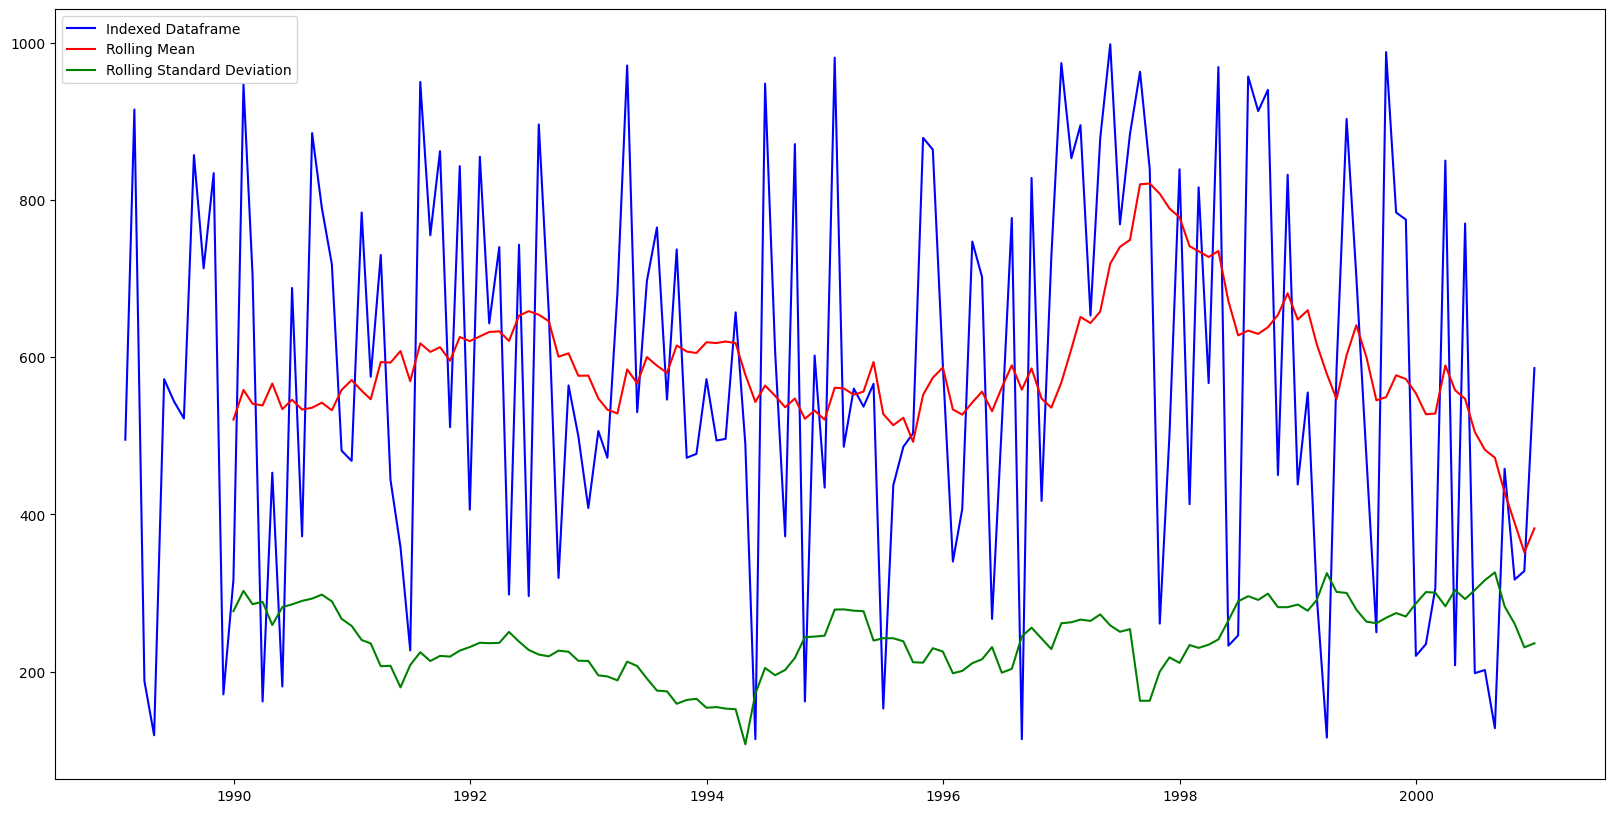

In [ ]:
# S3.3: Plot the rolling statistics
plt.figure(figsize = (20,10))
plt.plot(dummy_index_df, label = 'Indexed Dataframe', color = 'blue')
plt.plot(dummy_mean, label = 'Rolling Mean', color = 'red')
plt.plot(dummy_std, label = 'Rolling Standard Deviation', color = 'green')
plt.legend()
plt.show()

From the above graph, you can conclude that both mean (red colour) and standard deviation (black colour) are not constant. Hence, our data does not appears to be stationary. This was a visual inspection technique.

Let us confirm the stationarity of the dataset using a statistical test called ADF test.

**2. ADF (Augmented Dickey-Fuller) Test**

In this method, we take a null hypothesis that the data is non-stationary. After executing this test, it will give some results consisting of test statistics and some other critical values that help to define the stationarity. If the test statistic is less than the critical value then we can reject the null hypothesis and say that the series is stationary.

For this test, use a function called `adfuller()` of `statsmodels.tsa.stattools` module and pass the indexed DataFrame as input to this function.

In [ ]:
# S3.4: Perform ADF test
from statsmodels.tsa.stattools import adfuller

dummy_adf = adfuller(dummy_index_df['Sales'])
dummy_adf

(-7.699960323333855,
 1.3475340295101073e-11,
 1,
 142,
 {'1%': -3.477261624048995,
  '5%': -2.8821181874544233,
  '10%': -2.5777431104939494},
 1788.3919134562927)

The `adfuller()` function returned a tuple.

- The element at index `0` is the **test statistic**.  The more negative this number is, the more likely that the data is stationary. In this case, it is `-11.638` approximately which indicates that the data seems to be stationary.

- The element at index `1` is the **p-value**.
  - If the p-value is less than the critical value (usually 0.05)$\rightarrow$ Reject null hypothesis $\rightarrow$ Reject non-stationarity.
  - If the p-value is greater than the critical value $\rightarrow$ Accept null hypothesis $\rightarrow$ Accept non-stationarity.

  In this case, it is definitely less than 0.05  which means that the null hypothesis is rejected and the data is stationary.

- The last item in the tuple is a dictionary. This stores critical values of the test statistic at $1\%$ , $5\%$ , and $10\%$ confidence intervals. These values should be as close as possible to the test statistic value (index `0` element), which is not the case for our dataset.

Ignore rest of the tuple items for now. Let us again print these tuple values separately.

In [ ]:
# S3.5: Print each element of tuple returned by 'adfuller()' function.
# Print 'ADF Statistic' using 0-th index of ADF Test Vatiable

print(dummy_adf[0])
# Print 'p-value' using 1-st element index of ADF Test Variable
print(dummy_adf[1])


# Print Critical Values by iterating over 4-th index of ADF Test Variable
# Create a for loop for 4-th index items and store them in key value
for i,j in dummy_adf[4].items():
  print(i)
  print(j)



-7.699960323333855
1.3475340295101073e-11
1%
-3.477261624048995
5%
-2.8821181874544233
10%
-2.5777431104939494


TypeError: ignored

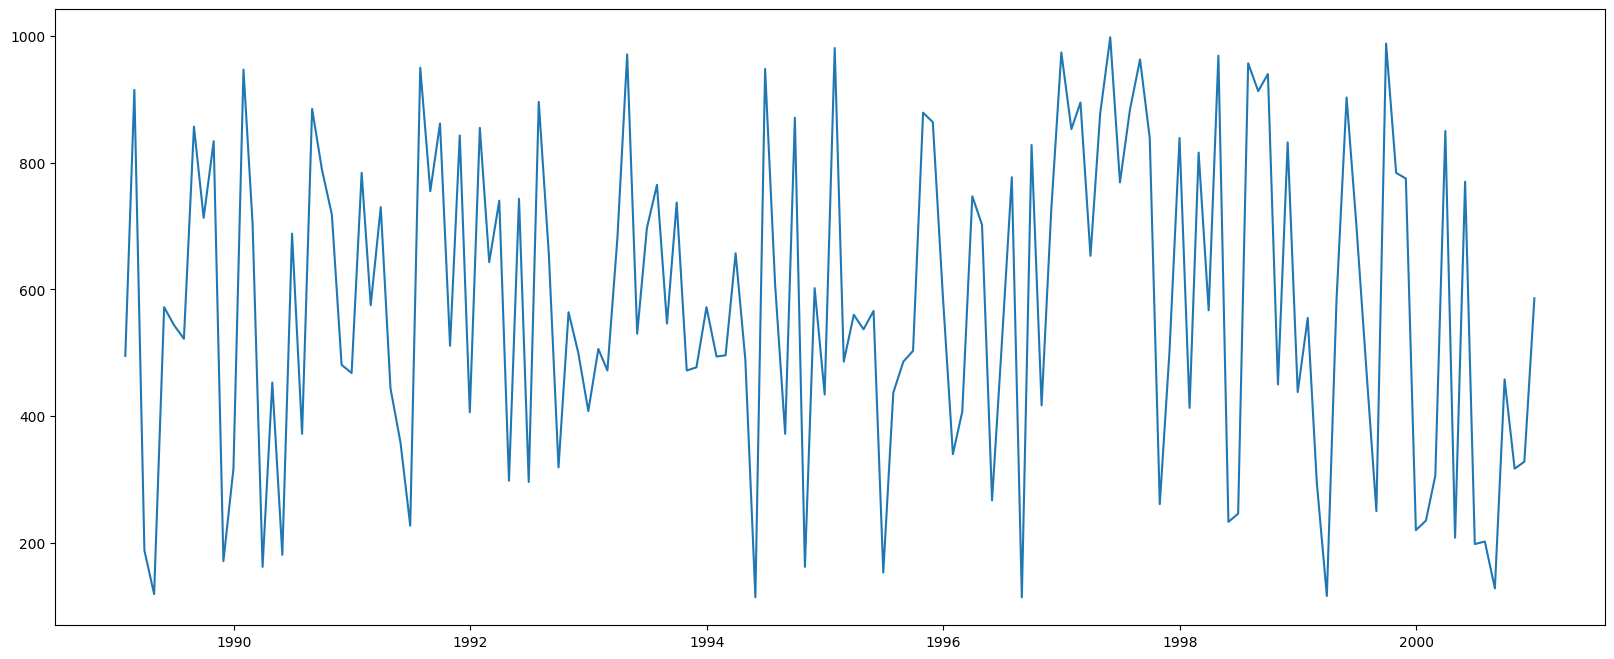

In [ ]:
plt.figure(figsize = (20,8))
plt.plot(dummy_index_df)
plt.show()

Hence, from the above ADF test result, we can see that p-value  is very small.  Hence, we can conclude that although the critical values are not at all close to the test statistics, our time series data at the moment looks **Stationary**.

However, with real world dataset, this may not be the case. You may get a very high p-value indicating that the time series data is not stationary. Such data is not suitable for time-series modelling.
Hence, we need to apply certain transformations to our data to make it stationary. This is similar to the feature engineering process usually done in supervised learning.

We will stop here. In the next class, we will learn various data transformation techniques to achieve decent test-statistic value and better stationarity for our time series data.

---

### **Project**

You can now attempt the **Applied Tech Project 127 - ARIMA I - Components of Time Series** on your own.

**Applied Tech Project 127 - Components of Time Series** : https://colab.research.google.com/drive/1PWacpsS3Vj9WV2hgNAJeMGweUCe-aDY-



---

